In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import matplotlib.font_manager as fm
import yfinance as yf
import datetime
from datetime import timedelta, datetime
import openpyxl
import setuptools
import pandas_datareader as pdr
import xlwings as xw
from itertools import product

In [205]:
caminho_mensal_gare = r"G:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\3. MENSAL\GAME"
df_fundos_corretoras = pd.read_excel(f"{caminho_mensal_gare}\\Corretoras_Fundos_-_Novembro.xlsx")
dfMENSAL = pd.read_excel(f"{caminho_mensal_gare}\\BASE_MENSAL_GAME_NOV.xlsx")
dfMENSAL = dfMENSAL.rename(columns={'CATEGORIAS ATUAIS':'CATEGORIAS_ATUAIS', 'CATEGORIAS ANTIGAS':'CATEGORIAS_ANTIGAS'})
dfCOMPRA = dfMENSAL.query('OPERAÇÃO == "Compra"')
dfVENDA = dfMENSAL.query('OPERAÇÃO == "Venda"')

dfCOMPRA_final = dfCOMPRA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                      'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last', 'VAR_PRECO':'sum','CATEGORIAS_ATUAIS':'last',
                                                                      'CATEGORIAS_ANTIGAS':'first','Participação_sup':'sum','DATA':'first',
                                                                      'CATEGORIAS':'first'})
                                                                                                                            
dfVENDA_final = dfVENDA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                    'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last','VAR_PRECO':'sum','CATEGORIAS_ATUAIS':'last',
                                                                    'CATEGORIAS_ANTIGAS':'first','Participação_sup':'sum','DATA':'first',
                                                                    'CATEGORIAS':'first'})

dfMENSAL_final = dfMENSAL.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                    'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last','VAR_PRECO':'sum','CATEGORIAS_ATUAIS':'last',
                                                                    'CATEGORIAS_ANTIGAS':'first','Participação_sup':'sum','DATA':'first',
                                                                    'CATEGORIAS':'first'})

total_compra = dfCOMPRA['VAR_PRECO'].sum()
total_venda = dfVENDA['VAR_PRECO'].sum()
delta_sum = total_compra+total_venda
print('o valor de compra é {} e o valor de venda é {}, e o total é {}'.format(total_compra, total_venda, delta_sum))

#INSIRO O CAMINHO DAS FONTES
caminho_Avenir = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Avenir Next LT Pro Regular.otf'
caminho_Geometeos = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Geometos Rounded.ttf'

#ALIMENTO DUAS VARIAVEIS COM AS FONTES
Avenir = fm.FontProperties(fname=caminho_Avenir)
Geometeos = fm.FontProperties(fname=caminho_Geometeos)

#FAÇO O MATPLTOLIB RECONHEÇER AS FONTES COMO FAMILIARIES
plt.rcParams['font.family'] = Avenir.get_name()
plt.rcParams['font.family'] = Avenir.get_name()

o valor de compra é 1317843.4300000002 e o valor de venda é 1317843.4300000002, e o total é 2635686.8600000003


In [206]:
def graf_barras_zeragens(
    df,
    filename,
    color='#3B5279',
    figsize=(8, 4),
    width=0.8,
    fontsize_y=2,
    fontsize_label=9,
    font=Avenir
):

    fig, ax = plt.subplots(figsize=figsize)

    sb.barplot(
        data=df,
        x='VAR_PRECO',
        y='CATEGORIAS_ANTIGAS',
        ax=ax,
        color=color,
        dodge=True,
        width=width
    )

    ylabels = df['CATEGORIAS_ANTIGAS'].unique()
    ax.set_yticks(range(len(ylabels)))
    ax.set_yticklabels(ylabels, fontsize=fontsize_y, fontproperties=font)

    for p in ax.patches:
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2

        if abs(x) >= 1:
            label = f"{int(round(abs(x))):,}".replace(",", ".")

            ax.text(
                x + (0.01 * x) if x >= 0 else x - (0.01 * abs(x)),
                y,
                label,
                ha='left' if x >= 0 else 'right',
                va='center',
                color='black',
                fontsize=fontsize_label,
                fontproperties=font
            )

    # Ajustar as bordas
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)

    # Rótulos e legenda
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='-', loc='lower right', fontsize=0)

    plt.tight_layout()

    fig.savefig(filename, transparent=True, dpi=300, bbox_inches='tight')
    


def graf_compra_e_venda(
        df_cv,
        filename_cv,
        palette_cv={'Venda': '#767070', 'Compra': '#3B5279'},
        figsize_cv=(8, 4),
        width_cv=0.8,
        fontsize_y=2,
        fontsize_label_cv=9,
        font_cv=Avenir
):
    fig, ax = plt.subplots(figsize=figsize_cv)

    sb.barplot(
        data=df_cv,
        x='VAR_PRECO',
        y='CATEGORIAS_ANTIGAS',
        hue='OPERAÇÃO',
        ax=ax,
        palette=palette_cv,
        dodge=True,
        width=width_cv
    )

    # usa o DataFrame certo
    ylabels = df_cv['CATEGORIAS_ANTIGAS'].unique()
    ax.set_yticks(range(len(ylabels)))
    ax.set_yticklabels(ylabels, fontsize=fontsize_y, fontproperties=font_cv)

    for p in ax.patches:
        # Obtém a largura (valor de x) e a posição do centro da barra
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2

        # Adiciona rótulos formatados com separador de milhares
        if abs(x) >= 1:
            label = f"{int(round(abs(x))):,}".replace(",", ".")

            ax.text(
                x + (0.01 * x) if x >= 0 else x - (0.01 * abs(x)),
                y,
                label,
                ha='left' if x >= 0 else 'right',
                va='center',
                color='black',
                fontsize=fontsize_label_cv,
                fontproperties=font_cv
            )

    # Ajustar os spines (bordas)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)

    # Rótulos e legenda
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='-', loc='lower right', fontsize=0)

    plt.tight_layout()

    fig.savefig(filename_cv, transparent=True, dpi=300, bbox_inches='tight')

import matplotlib.pyplot as plt
import os

def plotar_grafico_horizontal_empilhado(df, filename_cv):
    # Define paleta de cores
    cores = {
        'VENDA': '#767070',
        'COMPRA': '#3B5279',
        'ZERAGENS': '#AFABAB'
    }

    categorias = df['CATEGORIAS_ANTIGAS']
    vendas = df['VENDA']
    compras = df['COMPRA']
    zeragens = df['ZERAGENS']

    fig, ax = plt.subplots(figsize=(8, 4))

    bars1 = ax.barh(categorias, vendas, color=cores['VENDA'])
    bars2 = ax.barh(categorias, compras, left=vendas, color=cores['COMPRA'])
    bars3 = ax.barh(categorias, zeragens, left=vendas + compras, color=cores['ZERAGENS'])

    for i in range(len(categorias)):
        ax.text(vendas[i] / 2, i, f'{int(vendas[i]):,}'.replace(',', '.'), ha='center', va='center', fontsize=8, color='white')
        ax.text(vendas[i] + compras[i] / 2, i, f'{int(compras[i]):,}'.replace(',', '.'), ha='center', va='center', fontsize=8, color='white')
        ax.text(vendas[i] + compras[i] + zeragens[i] / 2, i, f'{int(zeragens[i]):,}'.replace(',', '.'), ha='center', va='center', fontsize=8, color='black')

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(True)
    for spine_name, spine in ax.spines.items():
        spine.set_visible(spine_name == 'left')

    plt.tight_layout()
    fig.savefig(filename_cv, transparent=True, dpi=300, bbox_inches='tight')


    
def garantir_categorias_completas(
    df: pd.DataFrame,
    categoria_col="CATEGORIAS",
    operacao_col="OPERAÇÃO",
    pfpj_col="PF_PJ",
    classe_col="CLASSE_CATEGORIA",
    categorias_esperadas=range(1, 11),
    pfpj_esperado=("PF", "PJ"),
):
    mapa_classe_categoria = {
        1: "0-1k",
        2: "1k-5k",
        3: "5k-20k",
        4: "20k-50k",
        5: "50k-100k",
        6: "100k-500k",
        7: "500k-1M",
        8: "1M-3M",
        9: "3M-15M",
        10: ">15M"
    }

    df = df.copy()

    # 1) NORMALIZA o tipo da categoria (resolve o bug clássico int vs str)
    df[categoria_col] = pd.to_numeric(df[categoria_col], errors="coerce").astype("Int64")

    # 2) Detecta a operação (Compra ou Venda) — exige apenas uma
    operacoes = df[operacao_col].dropna().unique()
    if len(operacoes) != 1:
        raise ValueError("Esperado dataframe com apenas um tipo de OPERAÇÃO (somente Compra ou somente Venda).")
    operacao = operacoes[0]

    # 3) Se existirem duplicatas por chave (CATEGORIAS + PF_PJ), agrega antes
    chaves = [categoria_col, pfpj_col]
    if df.duplicated(chaves).any():
        cols_num = df.select_dtypes(include="number").columns
        agg = {c: "sum" for c in cols_num}
        # mantém a operação/strings coerentes (pega o primeiro)
        for c in df.columns:
            if c not in agg and c not in chaves:
                agg[c] = "first"
        df = df.groupby(chaves, as_index=False).agg(agg)

    # 4) Cria a GRADE completa esperada (1..10 x PF/PJ)
    base = pd.DataFrame(list(product(list(categorias_esperadas), list(pfpj_esperado))),
                        columns=[categoria_col, pfpj_col])

    base[operacao_col] = operacao
    base["OPERAÇÃO_PF_PJ"] = base.apply(lambda r: f"{operacao} {r[pfpj_col]}", axis=1)
    base["VAR_PRECO"] = 0.0
    base["% PARTICIPAÇÃO"] = 0.0
    base[classe_col] = base[categoria_col].map(mapa_classe_categoria)

    # 5) Merge: o que existe no df REAL sobrescreve a base sintética
    out = base.merge(df, on=chaves, how="left", suffixes=("_base", ""))

    # Para colunas que existem nos dois, prioriza as do df original quando vierem preenchidas
    for col in base.columns:
        if col in out.columns and f"{col}_base" in out.columns:
            out[col] = out[col].combine_first(out[f"{col}_base"])
            out.drop(columns=[f"{col}_base"], inplace=True)

    # 6) Ordena para ficar bonito/consistente
    out = out.sort_values([categoria_col, pfpj_col]).reset_index(drop=True)

    return out

In [207]:
dfCOMPRA_final['Participação_sup'] = (dfCOMPRA_final['VAR_PRECO']/total_compra)*100
compra1 = dfCOMPRA_final['Participação_sup'].sum()
dfVENDA_final['Participação_sup'] = (dfVENDA_final['VAR_PRECO']/total_venda)*100
venda1 = dfVENDA_final['Participação_sup'].sum()
print('o total de compra é {} e o total de venda é {}'.format(compra1, venda1))

o total de compra é 99.99999999999999 e o total de venda é 100.0


In [208]:
plim = dfCOMPRA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

plim.set_index('CATEGORIAS')

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

plim['OPERAÇÃO_PF_PJ'] = plim['OPERAÇÃO'] + ' ' + plim['PF_PJ']

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['% PARTICIPAÇÃO'] = ((plim['VAR_PRECO']/(total_compra))*100).round(2)

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

mapeamento = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M',10:'>15M'}

plim['CLASSE_CATEGORIA'] = plim['CATEGORIAS'].map(mapeamento)

plim = plim.sort_values(by='CATEGORIAS')

plim['VAR_PRECO'].astype(float)

plim['VAR_PRECO'] = plim['VAR_PRECO'].round(2)

plim

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,200773.15,Compra PF,15.23,0-1k
1,1,Compra,PJ,68.01,Compra PJ,0.01,0-1k
2,2,Compra,PF,240738.56,Compra PF,18.27,1k-5k
3,2,Compra,PJ,66275.07,Compra PJ,5.03,1k-5k
4,3,Compra,PF,260772.30,Compra PF,19.79,5k-20k
5,4,Compra,PF,81830.65,Compra PF,6.21,20k-50k
6,5,Compra,PF,63120.59,Compra PF,4.79,50k-100k
7,5,Compra,PJ,92996.96,Compra PJ,7.06,50k-100k
8,6,Compra,PF,153698.17,Compra PF,11.66,100k-500k
9,6,Compra,PJ,32305.60,Compra PJ,2.45,100k-500k


In [209]:
v = dfVENDA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

v.set_index('CATEGORIAS')

v['CATEGORIAS'] = v['CATEGORIAS'].astype(int)

v['OPERAÇÃO_PF_PJ'] = v['OPERAÇÃO'] + ' ' + v['PF_PJ']

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['% PARTICIPAÇÃO'] = ((v['VAR_PRECO']/(total_venda))*100).round(2)

mapeamento = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M',10:'>15M'}

v['CLASSE_CATEGORIA'] = v['CATEGORIAS'].map(mapeamento)

v['CATEGORIAS'] = v['CATEGORIAS'].astype(int)

v = v.sort_values(by='CATEGORIAS')

v['VAR_PRECO'].astype(float)

v['VAR_PRECO'] = v['VAR_PRECO'].round(2)

v

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Venda,PF,-103764.97,Venda PF,-7.87,0-1k
1,1,Venda,PJ,-618.31,Venda PJ,-0.05,0-1k
2,2,Venda,PF,-236622.54,Venda PF,-17.96,1k-5k
3,3,Venda,PF,-312358.03,Venda PF,-23.70,5k-20k
4,3,Venda,PJ,-41563.49,Venda PJ,-3.15,5k-20k
5,4,Venda,PF,-163281.51,Venda PF,-12.39,20k-50k
6,5,Venda,PF,-56174.05,Venda PF,-4.26,50k-100k
7,5,Venda,PJ,-91967.54,Venda PJ,-6.98,50k-100k
8,6,Venda,PF,-293033.54,Venda PF,-22.24,100k-500k
9,6,Venda,PJ,-18459.45,Venda PJ,-1.40,100k-500k


In [210]:
plim = garantir_categorias_completas(plim)
v = garantir_categorias_completas(v)

In [211]:
plim

,CATEGORIAS,PF_PJ,OPERAÇÃO,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,PF,Compra,200773.15,Compra PF,15.23,0-1k
1,1,PJ,Compra,68.01,Compra PJ,0.01,0-1k
2,2,PF,Compra,240738.56,Compra PF,18.27,1k-5k
3,2,PJ,Compra,66275.07,Compra PJ,5.03,1k-5k
4,3,PF,Compra,260772.30,Compra PF,19.79,5k-20k
5,3,PJ,Compra,0.00,Compra PJ,0.00,5k-20k
6,4,PF,Compra,81830.65,Compra PF,6.21,20k-50k
7,4,PJ,Compra,0.00,Compra PJ,0.00,20k-50k
8,5,PF,Compra,63120.59,Compra PF,4.79,50k-100k
9,5,PJ,Compra,92996.96,Compra PJ,7.06,50k-100k


In [212]:
v

,CATEGORIAS,PF_PJ,OPERAÇÃO,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,PF,Venda,-103764.97,Venda PF,-7.87,0-1k
1,1,PJ,Venda,-618.31,Venda PJ,-0.05,0-1k
2,2,PF,Venda,-236622.54,Venda PF,-17.96,1k-5k
3,2,PJ,Venda,0.00,Venda PJ,0.00,1k-5k
4,3,PF,Venda,-312358.03,Venda PF,-23.70,5k-20k
5,3,PJ,Venda,-41563.49,Venda PJ,-3.15,5k-20k
6,4,PF,Venda,-163281.51,Venda PF,-12.39,20k-50k
7,4,PJ,Venda,0.00,Venda PJ,0.00,20k-50k
8,5,PF,Venda,-56174.05,Venda PF,-4.26,50k-100k
9,5,PJ,Venda,-91967.54,Venda PJ,-6.98,50k-100k


C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_18356\1492811276.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next L

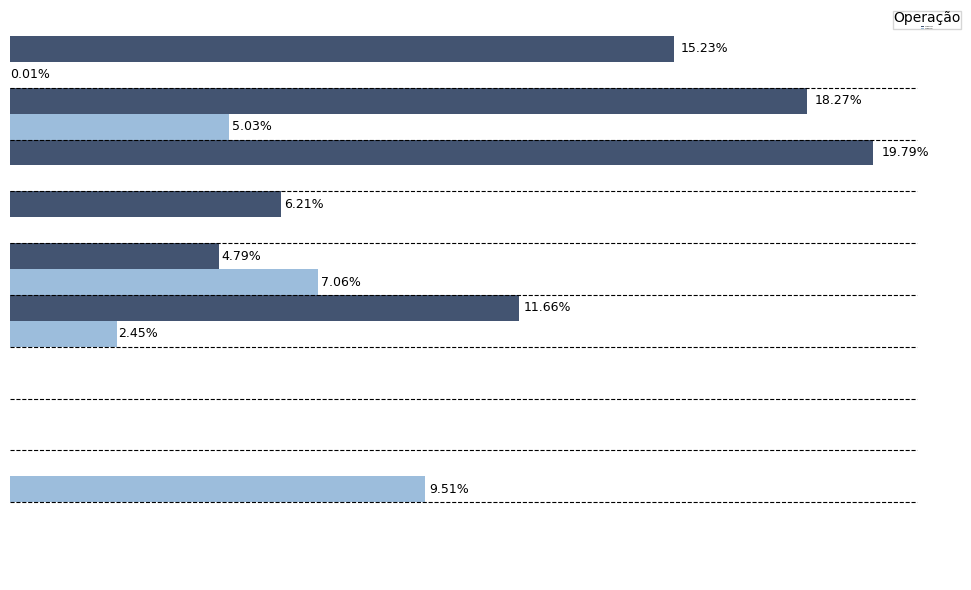

In [213]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=plim, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Compra PF': '#3B5279', 'Compra PJ': '#91BDE7','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(plim['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)


ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='upper right', fontsize = 0.05)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('COMPRA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_18356\1108589480.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT P

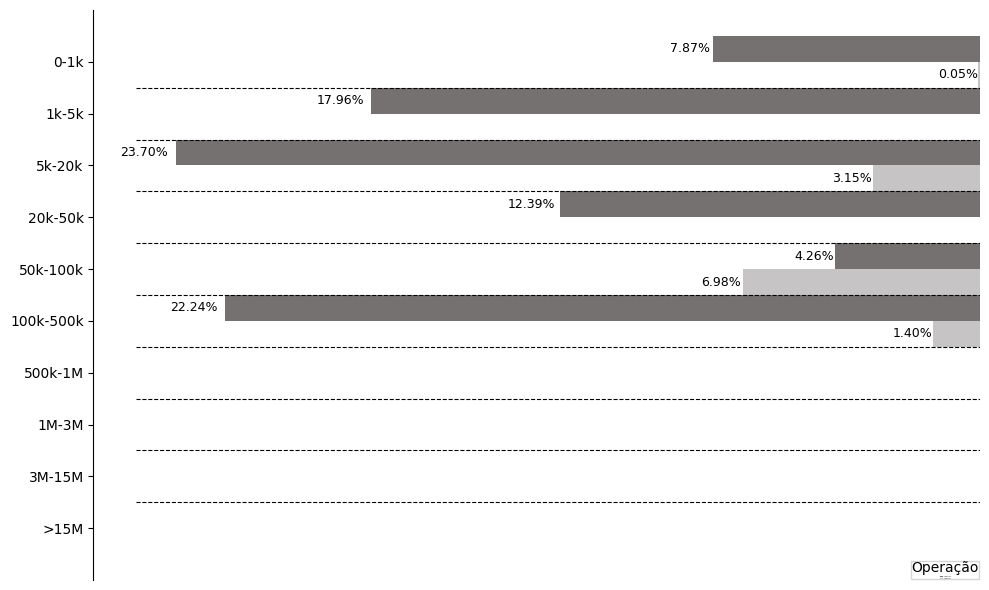

In [214]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=v, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Venda PF': '#767070', 'Venda PJ': '#C6C4C4','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(v['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)

#ax.vlines(x=0, ymin=-0.5, ymax=len(graf['CATEGORIAS'].unique()) - 0.5, color='black', linestyle='-', linewidth=1.5)

#ticks = [100000, 500000, 1000000, 2000000]
#ax.set_xticks(ticks)
#ax.set_xticklabels([f'R${x:,}' for x in ticks])
#ax.xaxis.set_tick_params(labelsize = (12))

#ax.set_yticks(range(len(ylabels)))
#ax.set_yticklabels(ylabels, fontsize=11, fontproperties = Avenir)
ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(True)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='lower right', fontsize = 1)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('VENDA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [215]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS_ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'

TOP10_Compra = dfCOMPRA_final[[Nome,cat,tipo,fin_mov,cat_atuais]]

TOP10_Compra = TOP10_Compra.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Compra['VAR_PRECO'] = TOP10_Compra['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

TOP10_Compra = TOP10_Compra.set_index('NOME')

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Compra['CATEGORIAS'] = TOP10_Compra['CATEGORIAS'].map(mapear)

TOP10_Compra

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS
NOME,,,,
OPORTUNIDADES IMOBILIÁRIAS I FUNDO DE INVESTIMENTO IMOBILIÁR,3M-15M,PJ,125264.37,3M-15M
KATIA RODRIGUES PORTO LEANDRO,100k-500k,PF,102748.17,100k-500k
XP INVESTIMENTOS CCTVM S/A,50k-100k,PJ,92996.96,100k-500k
XTX MARKETS TRADING LIMITED,1k-5k,PJ,66275.07,20k-50k
DARLI LAZZARINI JUNIOR,100k-500k,PF,42400.00,100k-500k
EDUARDO HENRIQUE LOPES GOMES,50k-100k,PF,42365.00,100k-500k
CAPITANIA SECURITIES II FDO IN,100k-500k,PJ,32305.60,100k-500k
SERGIO COLOMBO,20k-50k,PF,31630.40,20k-50k
HELISSON FERREIRA COSTA REIS,5k-20k,PF,16933.40,5k-20k


In [216]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS_ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
qtde = 'TOTAL_NOVO'

TOP10_Venda = dfVENDA_final[[Nome,cat,tipo,fin_mov, cat_atuais]]

TOP10_Venda = TOP10_Venda.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Venda['VAR_PRECO'] = TOP10_Venda['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Venda['CATEGORIAS'] = TOP10_Venda['CATEGORIAS'].map(mapear)

TOP10_Venda['CATEGORIAS_ATUAIS'] = TOP10_Venda['CATEGORIAS_ATUAIS'].fillna('0-1k')

TOP10_Venda = TOP10_Venda.set_index('NOME')

TOP10_Venda

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS
NOME,,,,
GASTAO LUIZ DA COSTA,100k-500k,PF,293033.54,20k-50k
XP INVESTIMENTOS CCTVM S/A,50k-100k,PJ,91967.54,100k-500k
RODRIGO ZAPELINI POSSOBON,50k-100k,PF,52576.00,1k-5k
JEREMIAS RAMLOW,20k-50k,PF,42461.84,0-1k
XTX MARKETS TRADING LIMITED,5k-20k,PJ,41563.49,0-1k
PAULO SOARES GONZAGA,20k-50k,PF,39768.23,0-1k
SERGIO COLOMBO,20k-50k,PF,31816.90,0-1k
RUTH KHAIRALLAH DE OLIVEIRA E SILVA,20k-50k,PF,20814.14,0-1k
BÁRBARA DE BARROS GONÇALVES VAZ,5k-20k,PF,18560.70,1k-5k


In [217]:
cont_dfcompra = dfCOMPRA['NOME'].value_counts().reset_index()
cont_dfcompra.columns=['NOME', 'count']

acomp_PJ_compra = dfCOMPRA_final.query('PF_PJ == "PJ"')

compra_pj = acomp_PJ_compra[[Nome,cat,tipo,fin_mov, cat_atuais]]

top10pj_compra = compra_pj.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

top10pj_compra['VAR_PRECO'] = top10pj_compra['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

top10pj_compra['CATEGORIAS'] = top10pj_compra['CATEGORIAS'].map(mapear)

top10pj_compra['CATEGORIAS_ATUAIS'] = top10pj_compra['CATEGORIAS_ATUAIS'].fillna('0-1k')


top10pj_compra = top10pj_compra.set_index('NOME')

top10pj_compra_final = top10pj_compra.merge(cont_dfcompra, on="NOME",how='left')

top10pj_compra_final['count'] = top10pj_compra_final['count'].fillna(0).astype(float)

top10pj_compra_final['VAR_PRECO'] = top10pj_compra_final['VAR_PRECO'].astype(float)

top10pj_compra_final['PACE'] = top10pj_compra_final['VAR_PRECO']/top10pj_compra_final['count']

top10pj_compra_final['PACE'] = top10pj_compra_final['PACE'].round(0)

top10pj_compra_final = top10pj_compra_final.rename(columns={'count':'COMPRAS'})

top10pj_compra_final


,NOME,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS,COMPRAS,PACE
0,OPORTUNIDADES IMOBILIÁRIAS I FUNDO DE INVESTIM...,3M-15M,PJ,125264.37,3M-15M,2.0,62632.0
1,XP INVESTIMENTOS CCTVM S/A,50k-100k,PJ,92996.96,100k-500k,10.0,9300.0
2,XTX MARKETS TRADING LIMITED,1k-5k,PJ,66275.07,20k-50k,7.0,9468.0
3,CAPITANIA SECURITIES II FDO IN,100k-500k,PJ,32305.60,100k-500k,3.0,10769.0
4,EDSON A S 22390527833,0-1k,PJ,42.44,0-1k,2.0,21.0
5,SIQUEIRA C S LTDA,0-1k,PJ,25.57,0-1k,2.0,13.0


In [218]:
cont_dfvenda = dfVENDA['NOME'].value_counts().reset_index()
cont_dfvenda.columns=['NOME', 'count']

acomp_PJ_venda = dfVENDA_final.query('PF_PJ == "PJ"')

venda_pj = acomp_PJ_venda[[Nome,cat,tipo,fin_mov, cat_atuais]]

top10pj_venda = venda_pj.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

top10pj_venda['VAR_PRECO'] = top10pj_venda['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

top10pj_venda['CATEGORIAS'] = top10pj_venda['CATEGORIAS'].map(mapear)

top10pj_venda['CATEGORIAS_ATUAIS'] = top10pj_venda['CATEGORIAS_ATUAIS'].fillna('0-1k')

top10pj_venda.set_index('NOME')

top10pj_venda_final = top10pj_venda.merge(cont_dfvenda, on='NOME', how='left')

top10pj_venda_final['count'] = top10pj_venda_final['count'].fillna(0).astype(float)

top10pj_venda_final['VAR_PRECO'] = top10pj_venda_final['VAR_PRECO'].fillna(0).astype(float)

top10pj_venda_final['PACE'] = (top10pj_venda_final['VAR_PRECO']/top10pj_venda_final['count']).round(0)

top10pj_venda_final = top10pj_venda_final.rename(columns={'count':'VENDAS'})

top10pj_venda_final


,NOME,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS,VENDAS,PACE
0,XP INVESTIMENTOS CCTVM S/A,50k-100k,PJ,91967.54,100k-500k,9.0,10219.0
1,XTX MARKETS TRADING LIMITED,5k-20k,PJ,41563.49,0-1k,6.0,6927.0
2,CAPITANIA REIT MASTER CP FIC DE FIM,100k-500k,PJ,18459.45,100k-500k,1.0,18459.0
3,SESITO IMOVEIS LTDA,0-1k,PJ,618.31,0-1k,1.0,618.0


# CATEGORIAS QUE MAIS COMPRARAM E VENDERAM

In [219]:
mapa = {'0-1k':1, '1k-5k':2, '5k-20k':3, '20k-50k':4, '50k-100k':5, '100k-500k':6, '500k-1M':7, '1M-3M':8, '3M-15M':9, '>15M':10}

CGCV_df = dfMENSAL.groupby(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])['VAR_PRECO'].sum().reset_index()

CGCV_df['CATEGORIAS_NUMERICAS'] = CGCV_df['CATEGORIAS_ANTIGAS'].map(mapa)
CGCV_df = CGCV_df.sort_values(['CATEGORIAS_NUMERICAS', 'OPERAÇÃO'], ascending=[True, False])

CGCV_sorted = CGCV_df.set_index(['CATEGORIAS_NUMERICAS','CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])

CGCV_sorted = (CGCV_sorted['VAR_PRECO']/1000).round(0)

CGCV_dataf = pd.DataFrame(CGCV_sorted)

CGCV_dataf = CGCV_dataf.reset_index()

CGCV_dataf

,CATEGORIAS_NUMERICAS,CATEGORIAS_ANTIGAS,OPERAÇÃO,VAR_PRECO
0,1,0-1k,Venda,105.0
1,1,0-1k,Compra,205.0
2,2,1k-5k,Venda,251.0
3,2,1k-5k,Compra,265.0
4,3,5k-20k,Venda,353.0
5,3,5k-20k,Compra,293.0
6,4,20k-50k,Venda,148.0
7,4,20k-50k,Compra,88.0
8,5,50k-100k,Venda,124.0
9,5,50k-100k,Compra,139.0


In [220]:
def zeragem(ca):
    if ca == 0:
        return 'Zerou'
    else:
        return 'Nao Zerou'

dfVENDA_final['ZERAGEM'] = dfVENDA_final['FINANCEIRO_NOVO'].apply(zeragem)

dfZERADOS = dfVENDA_final.query('ZERAGEM == "Zerou"')


CMZ_cotistas = dfZERADOS.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].count()
CMZ_cotistas = CMZ_cotistas.reset_index()
CMZ_cotistas['CATEGORIAS_NUMERICAS'] = CMZ_cotistas['CATEGORIAS_ANTIGAS'].map(mapa)
CMZ_cotistas = CMZ_cotistas.sort_values(['CATEGORIAS_NUMERICAS'], ascending=[True])



CMZ_cotistas_df = pd.DataFrame(CMZ_cotistas)
CMZ_cotistas_df = CMZ_cotistas_df.set_index(['CATEGORIAS_NUMERICAS','CATEGORIAS_ANTIGAS', 'VAR_PRECO'])
CMZ_cotistas_df = CMZ_cotistas_df.reset_index()
CMZ_cotistas_df


,CATEGORIAS_NUMERICAS,CATEGORIAS_ANTIGAS,VAR_PRECO
0,1,0-1k,531
1,2,1k-5k,79
2,3,5k-20k,20
3,4,20k-50k,4


In [221]:
# Mapa de ordenação
mapa = {
    '0-1k': 1, '1k-5k': 2, '5k-20k': 3, '20k-50k': 4,
    '50k-100k': 5, '100k-500k': 6, '500k-1M': 7,
    '1M-3M': 8, '3M-15M': 9, '>15M': 10
}

# Agrupa e soma por categoria e operação
CGCV_df = dfMENSAL_final.groupby(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])['VAR_PRECO'].sum().reset_index()

# Pivotando para ter colunas separadas de Compra e Venda
CGCV_pivot = CGCV_df.pivot(index='CATEGORIAS_ANTIGAS', columns='OPERAÇÃO', values='VAR_PRECO').fillna(0)

# Renomeia colunas para o formato desejado
CGCV_pivot = CGCV_pivot.rename(columns={'Venda': 'VENDA', 'Compra': 'COMPRA'})

# Cria coluna com valores de zeragens
zeragens = dfZERADOS.groupby('CATEGORIAS_ANTIGAS')['VAR_PRECO'].sum().reindex(CGCV_pivot.index).fillna(0)

# Adiciona coluna de zeragens ao DataFrame
CGCV_pivot['ZERAGENS'] = zeragens

# Reseta índice e mapeia ordem
CGCV_pivot = CGCV_pivot.reset_index()
CGCV_pivot['CATEGORIAS_NUMERICAS'] = CGCV_pivot['CATEGORIAS_ANTIGAS'].map(mapa)

# Ordena pela categoria numérica
CGCV_pivot = CGCV_pivot.sort_values('CATEGORIAS_NUMERICAS').drop(columns='CATEGORIAS_NUMERICAS')
CGCV_pivot['COMPRA'] = (CGCV_pivot['COMPRA']/1000).round(0)
CGCV_pivot['VENDA'] = (CGCV_pivot['VENDA']/1000).round(0)
CGCV_pivot['ZERAGENS'] = (CGCV_pivot['ZERAGENS']/1000).round(0)
CGCV_pivot = CGCV_pivot

# Resultado final
CGCV_pivot_df = pd.DataFrame(CGCV_pivot)
CGCV_pivot_df = CGCV_pivot_df.set_index(['CATEGORIAS_ANTIGAS', 'COMPRA', 'VENDA', 'ZERAGENS'])
CGCV_pivot_df = CGCV_pivot_df.reset_index()
CGCV_pivot_df


OPERAÇÃO,CATEGORIAS_ANTIGAS,COMPRA,VENDA,ZERAGENS
0,0-1k,235.0,87.0,88.0
1,1k-5k,347.0,203.0,192.0
2,5k-20k,293.0,293.0,198.0
3,20k-50k,114.0,137.0,135.0
4,50k-100k,67.0,238.0,0.0
5,100k-500k,186.0,311.0,0.0
6,3M-15M,125.0,0.0,0.0


# CATEGORIAS QUE MAIS ZERARAM

In [222]:
def zeragem(ca):
    if ca == 0:
        return 'Zerou'
    else:
        return 'Nao Zerou'

dfVENDA_final['ZERAGEM'] = dfVENDA_final['FINANCEIRO_NOVO'].apply(zeragem)

dfZERADOS = dfVENDA_final.query('ZERAGEM == "Zerou"')


CMZ_cotistas = dfZERADOS.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].count()
CMZ_cotistas = CMZ_cotistas.reset_index()
CMZ_cotistas['CATEGORIAS_NUMERICAS'] = CMZ_cotistas['CATEGORIAS_ANTIGAS'].map(mapa)
CMZ_cotistas = CMZ_cotistas.sort_values(['CATEGORIAS_NUMERICAS'], ascending=[True])



CMZ_cotistas_df = pd.DataFrame(CMZ_cotistas)
CMZ_cotistas_df = CMZ_cotistas_df.set_index(['CATEGORIAS_NUMERICAS','CATEGORIAS_ANTIGAS', 'VAR_PRECO'])
CMZ_cotistas_df = CMZ_cotistas_df.reset_index()
CMZ_cotistas_df


,CATEGORIAS_NUMERICAS,CATEGORIAS_ANTIGAS,VAR_PRECO
0,1,0-1k,531
1,2,1k-5k,79
2,3,5k-20k,20
3,4,20k-50k,4


# DATA DE MAIORES ZERAGENS EM VOL FINANCEIRO

# ACOMPANHAMENTO COTISTAS COM TAG GARE15 E GALG15

findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

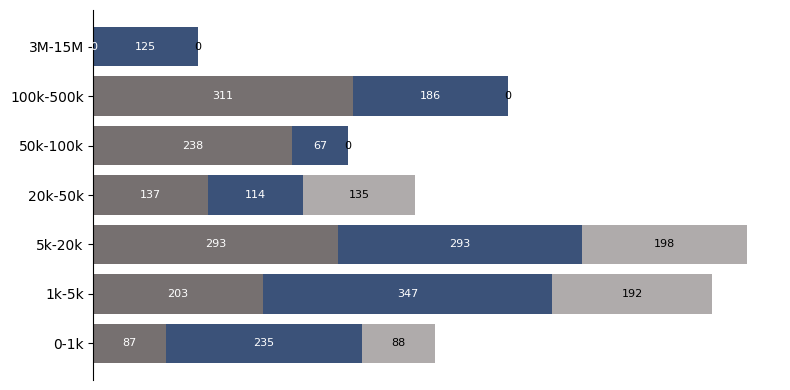

In [223]:
plotar_grafico_horizontal_empilhado(df = CGCV_pivot_df, 
                                    filename_cv='grafico_horizontal.png')

findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

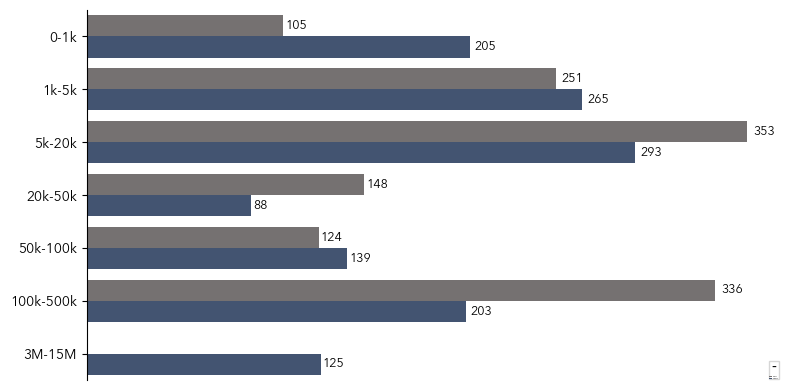

In [224]:
graf_compra_e_venda(
    df_cv=CGCV_dataf,
    filename_cv='CATEGORIAS_MCV.png',
    palette_cv={'Venda':'#767070', 'Compra':'#3B5279'}
)

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_18356\2791191767.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='-', loc='lower right', fontsize=0)
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not fou

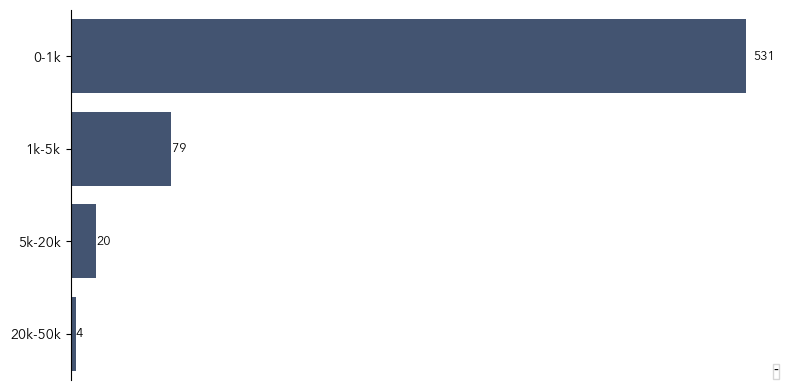

In [225]:
graf_barras_zeragens(
    df=CMZ_cotistas_df,
    filename='CATEGORIAS_zeragem_cotistas.png',
    color='#3B5279'
)

In [226]:
from pptx import Presentation
from pptx.util import Inches, Pt, Cm

#Caminho PPT e Imagens
c_ppt = r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\3. MENSAL\GAME\RELATORIO\RELATORIO_PASSIVO_MENSAL.Vteste.pptx"
img_compra = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\COMPRA_PF_E_PJ.png"
img_venda = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\VENDA_PF_E_PJ.png"
c_img_CAT_MCV = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\grafico_horizontal.png"
c_zer_img_qtde = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\CATEGORIAS_zeragem_cotistas.png"
c_img_CAT_GARE15_MCV = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\grafico_horizontal_GARE15.png"
c_img_zer_GARE15_Qtde = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\Zeragens_GARE15_Qtde_Cat.png"

#Abre a apresentação
prs=Presentation(c_ppt)

#Selecionando os slides e definindo a posição das imagens

slide1 = prs.slides[0]
slide2 = prs.slides[1]

#Imagem Compra
leftC = Cm(10.28)
topC = Cm(19.85)
widthC = Cm(7.53)
heightC = Cm(5.47)

#Imagem Venda
leftV = Cm(2.74)
topV = Cm(19.85)
widthV = Cm(7.68)
heightV = Cm(5.48)

#Imagem Categorias CxV
leftCxV = Cm(0.19)
topCxV = Cm(12.66)
widthCxV = Cm(9.71)
heightCxV = Cm(4.79)

#Imagem Categorias Zeragem Qtde
leftZ_qtde = Cm(11.08)
topZ_qtde = Cm(12.74)
widthZ_qtde = Cm(9.48)
heightZ_qtde = Cm(4.7)


#Adicionando as imagens aos slides

## Slide 1
slide1.shapes.add_picture(img_compra, leftC, topC, width=widthC, height=heightC)
slide1.shapes.add_picture(img_venda, leftV, topV, width=widthV, height=heightV)
## Slide2
slide2.shapes.add_picture(c_img_CAT_MCV, leftCxV, topCxV, width=widthCxV, height=heightCxV)
slide2.shapes.add_picture(c_zer_img_qtde, leftZ_qtde, topZ_qtde, width=widthZ_qtde, height=heightZ_qtde)

#Salvando a apresentação
prs.save(r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\3. MENSAL\GAME\RELATORIO\RELATORIO_PASSIVO_MENSAL.Vfinal.pptx")


# ANALISE DO COMPORTAMENTO DAS CORRETORAS EM OUTROS FUNDOS

In [227]:
#Criando o dataframe de top10 corretoras para criar as tabelas
df_fundos_corretoras_vendas = df_fundos_corretoras.drop(columns=['Mês', 'Fundo', 'Compras - Vtt'])
#Somando o volume de vendas das corretoras
df_fundos_corretoras_vendas = df_fundos_corretoras_vendas.groupby(['Corretora'])['Vendas -Vtt'].sum()
#Transformando o resultado da linha acima em dataframe
corretoras_vendas = pd.DataFrame(df_fundos_corretoras_vendas)
#Organizando o dataframe 'corretoras_vendas' do maior para o menor, pegando os 10 maiores 
top10_corretoras_vendas = corretoras_vendas.sort_values(by = ['Vendas -Vtt'], ascending=False).iloc[:10, :]
#resetando o index
top10_corretoras_vendas = top10_corretoras_vendas.reset_index()
#pegando apenas a coluna de corretoras do df anterior
top10_corretoras = top10_corretoras_vendas['Corretora']
#No df principal com todas as corretoras e fundos e volumes e selecionando apenas as corretoras do top10
df_fundos_corretoras_top = df_fundos_corretoras[df_fundos_corretoras['Corretora'].isin(top10_corretoras)].copy()
#criando uma tabela com o vol de compra apenas das corretoras do top10 e dos fundos
tabela_compras = (df_fundos_corretoras_top.pivot_table(index='Fundo',
                                                       columns='Corretora',
                                                       values='Compras - Vtt',
                                                       aggfunc='sum',
                                                       fill_value=0))
#criando uma tabela com o vol de venda apenas das corretoras do top10 e dos fundos
tabela_vendas = (df_fundos_corretoras_top.pivot_table(index='Fundo',
                                                      columns = 'Corretora',
                                                      values = 'Vendas -Vtt',
                                                      aggfunc='sum',
                                                      fill_value=0))

#resetando os indices para seguir o padrão do top10 corretoras
tabela_compras = tabela_compras.reindex(columns=top10_corretoras)
tabela_vendas = tabela_vendas.reindex(columns=top10_corretoras)
#ajustando os volumes
tabela_compras[top10_corretoras] = (tabela_compras[top10_corretoras]/1000).round(0)
tabela_vendas[top10_corretoras] = (tabela_vendas[top10_corretoras]/1000).round(0)
#criando uma tabela de saldo final diminuindo o valor de compra pelo valor de venda
tabela_saldo = tabela_compras[top10_corretoras] - tabela_vendas[top10_corretoras]
tabela_saldo = tabela_saldo.reset_index()

In [228]:
tabela_compras

Corretora,XP,GENIAL,ITAU,BTG PACTUAL,IDEAL,UBS,NU INVEST,INTER,NECTON,TORO
Fundo,,,,,,,,,,
CPTS11,39400.0,20366.0,26881.0,7918.0,3452.0,3184.0,4349.0,2835.0,255.0,513.0
GAME11,909.0,56.0,77.0,118.0,89.0,85.0,162.0,116.0,0.0,30.0
HGCR11,22927.0,15121.0,5325.0,5944.0,1680.0,5382.0,1792.0,1956.0,0.0,659.0
KNHF11,18875.0,10042.0,12305.0,4731.0,2155.0,4192.0,1590.0,1836.0,0.0,448.0
MANA11,8060.0,3794.0,3726.0,5534.0,483.0,444.0,1046.0,1232.0,0.0,161.0
MCRE11,30196.0,14573.0,5635.0,14900.0,1497.0,1791.0,1152.0,1412.0,252.0,133.0
MXRF11,84729.0,56496.0,7108.0,7013.0,6144.0,5124.0,28846.0,16970.0,4.0,7827.0


In [229]:
tabela_vendas

Corretora,XP,GENIAL,ITAU,BTG PACTUAL,IDEAL,UBS,NU INVEST,INTER,NECTON,TORO
Fundo,,,,,,,,,,
CPTS11,39877.0,19616.0,24520.0,6939.0,3177.0,3577.0,2426.0,1635.0,7741.0,276.0
GAME11,759.0,73.0,47.0,215.0,65.0,85.0,96.0,83.0,0.0,8.0
HGCR11,24349.0,13669.0,8033.0,10083.0,1392.0,5633.0,564.0,899.0,0.0,202.0
KNHF11,12295.0,9793.0,20786.0,2606.0,2379.0,4926.0,233.0,1473.0,694.0,146.0
MANA11,12544.0,3205.0,999.0,4392.0,450.0,586.0,197.0,440.0,0.0,29.0
MCRE11,24139.0,15259.0,4459.0,10091.0,12456.0,2910.0,363.0,1633.0,619.0,44.0
MXRF11,109364.0,53060.0,6383.0,7113.0,5693.0,5011.0,15971.0,10609.0,479.0,6986.0


In [230]:

tabela_saldo

Corretora,Fundo,XP,GENIAL,ITAU,BTG PACTUAL,IDEAL,UBS,NU INVEST,INTER,NECTON,TORO
0,CPTS11,-477.0,750.0,2361.0,979.0,275.0,-393.0,1923.0,1200.0,-7486.0,237.0
1,GAME11,150.0,-17.0,30.0,-97.0,24.0,0.0,66.0,33.0,0.0,22.0
2,HGCR11,-1422.0,1452.0,-2708.0,-4139.0,288.0,-251.0,1228.0,1057.0,0.0,457.0
3,KNHF11,6580.0,249.0,-8481.0,2125.0,-224.0,-734.0,1357.0,363.0,-694.0,302.0
4,MANA11,-4484.0,589.0,2727.0,1142.0,33.0,-142.0,849.0,792.0,0.0,132.0
5,MCRE11,6057.0,-686.0,1176.0,4809.0,-10959.0,-1119.0,789.0,-221.0,-367.0,89.0
6,MXRF11,-24635.0,3436.0,725.0,-100.0,451.0,113.0,12875.0,6361.0,-475.0,841.0


In [231]:
# Caminhos
caminho_arquivo = r"C:\Users\LucasCavalcante\Documents\FORMATAR_PASSIVO_MENSAL_BASE\BASE_RELATORIO_PASSIVO_MENSAL_GAME.V5.xlsm"
caminho_destino = r"C:\Users\LucasCavalcante\Documents\FORMATAR_PASSIVO_MENSAL_MACRO\BASE_RELATORIO_PASSIVO_MENSAL_GAME.V5_MACRO.xlsm"

# DataFrames e locais onde serão colados
dfs_cola = [
    (TOP10_Venda, 'DADOS2', 'N4'),
    (TOP10_Compra, 'DADOS2', 'N19'),
    (top10pj_compra_final, 'DADOS2', 'M36'),
    (top10pj_venda_final, 'DADOS2', 'M51'),
    (tabela_compras, 'COMP_PASSIVOS', 'D15'),
    (tabela_vendas, 'COMP_PASSIVOS', 'D27'),
    (tabela_saldo, 'COMP_PASSIVOS', 'C39')
]

# Abrir Excel
app = None
wb = None

try:
    app = xw.App(visible=False)
    wb = app.books.open(caminho_arquivo)

    for df, aba, celula in dfs_cola:
        try:
            ws = wb.sheets[aba]
            ws.range(celula).value = df
        except Exception as e:
            print(f"❌ Erro ao colar na aba '{aba}' na célula {celula}: {e}")

    wb.save(caminho_destino)
    print(f"✅ Arquivo salvo com sucesso em: {caminho_destino}")

except Exception as e:
    print(f"❌ Erro geral ao processar o arquivo: {e}")

finally:
    if wb:
        wb.close()
    if app:
        app.quit()


✅ Arquivo salvo com sucesso em: C:\Users\LucasCavalcante\Documents\FORMATAR_PASSIVO_MENSAL_MACRO\BASE_RELATORIO_PASSIVO_MENSAL_GAME.V5_MACRO.xlsm


In [232]:
#SALVANDO O DATAFRAME EM .XLSX EM UMA PASTA ESPECIFICA

#MAPEANDO O CAMINHO E SALVANDO A PLANILHA TRATADA COMO .XLSX
pasta_destino = r'C:\Users\LucasCavalcante\Desktop\old'
#CASO A PASTA NÃO EXISTA UMA SERA CRIADA IMEDIANTAMENT
os.makedirs(pasta_destino, exist_ok=True)
#INSERE EM UMA VARIAVEL O CAMINHO E O NOME DO ARQUIVO
caminho_arquivo_excel = os.path.join(pasta_destino, 'mensal_teste.xlsx')
#EXPORTA O ARQUIVO PARA CSV E O SALVA NA PASTA QUE O CAMINHO INDICA
dfMENSAL_final.to_excel(caminho_arquivo_excel, index=False)

#print('Arquivo salvo com sucesso')